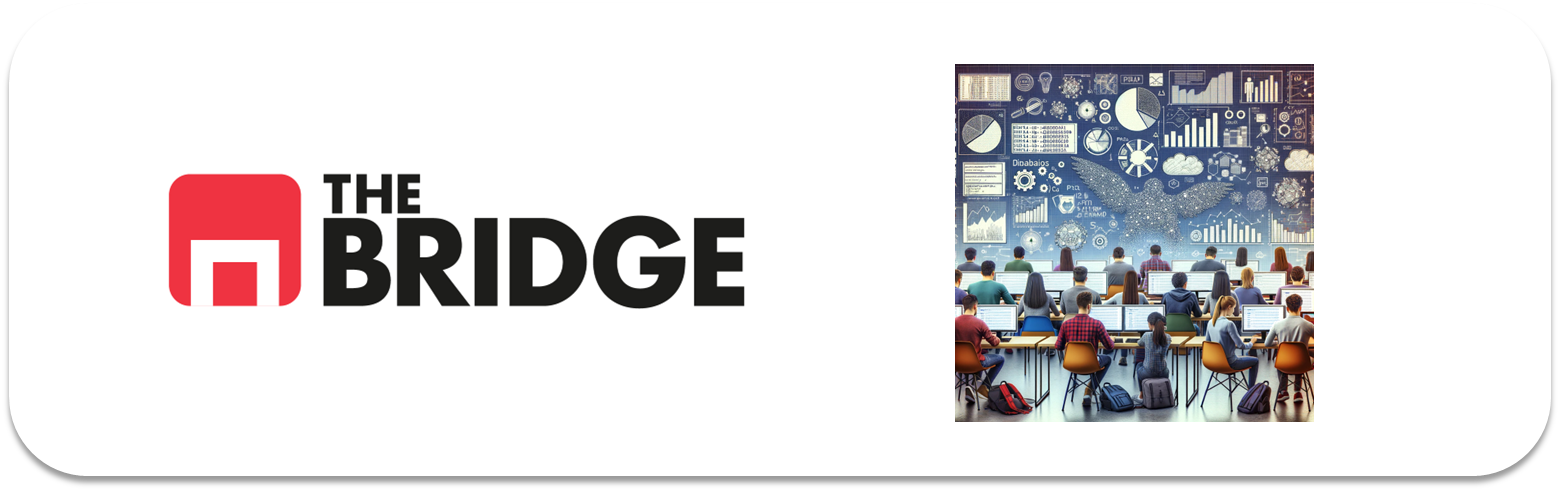

## PRACTICA OBLIGATORIA: **Estadistica Inferencial y Probabilidad**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## #1 Titanic

Carga el dataset del titanic, y contesta a las siguientes preguntas:

1. ¿Cuál es la probabilidad de superviviencia de un niño?
2. ¿Cuál es la probabilidad de que una mujer viajase sola?
3. ¿Cuál es la probabilidad de sobreviviese un hombre entre 30 y 40 años que embarcó en Southampton y no tuvo que pagar billete?
4. ¿Y si hubiera acompañado de 2 familiares?
5. Si consideramos ahora que queremos tener cierta confianza estadística en nuestras probabilidades (ten en cuenta que estamos extrapolando los ratios de una muestra), ¿cuál sería el rango de probabilidades de sobrevivir de una persona que viajase sola al 95%?
6. EXTRA: ¿Y si además el pasajero de 5 fuera un pasajero de tercera o de segunda?

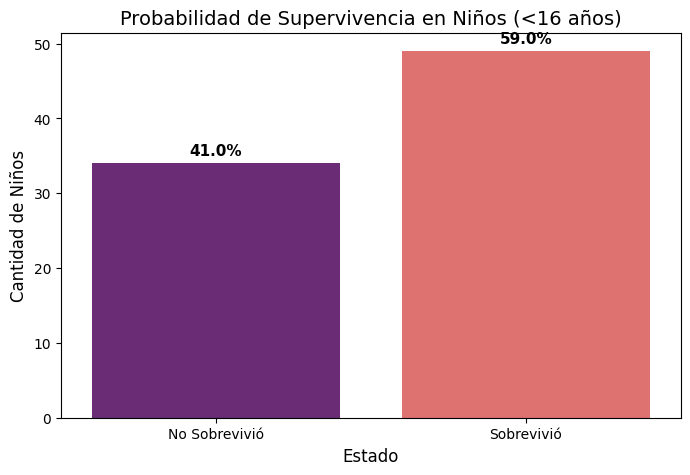

Confirmado: La probabilidad de supervivencia es 59.04%


In [3]:
df = sns.load_dataset('titanic')
ninos = df[df['age'] < 16].copy()

if ninos.empty:
    print("Error: No se encontraron pasajeros menores de 16 años.")
else:
    plt.figure(figsize=(8, 5))

    ax = sns.countplot(data=ninos, x='survived', palette='magma', hue='survived', legend=False)

    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No Sobrevivió', 'Sobrevivió'])

    # Títulos y etiquetas
    plt.title('Probabilidad de Supervivencia en Niños (<16 años)', fontsize=14)
    plt.xlabel('Estado', fontsize=12)
    plt.ylabel('Cantidad de Niños', fontsize=12)

    #  Añadir porcentajes sobre las barras
    total_ninos = len(ninos)
    for p in ax.patches:
        height = p.get_height()
        porcentaje = f'{100 * height / total_ninos:.1f}%'
        ax.annotate(porcentaje, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 9), 
                    textcoords = 'offset points',
                    fontsize=11, fontweight='bold')

    plt.show()

    # Cálculo final para confirmar
    prob = ninos['survived'].mean()
    print(f"Confirmado: La probabilidad de supervivencia es {prob:.2%}")

plt.show()

La probabilidad de que una mujer viajase sola es: 40.13%


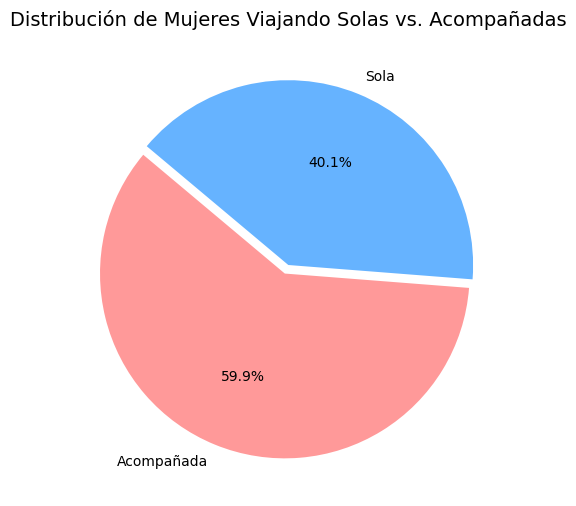

In [4]:
# Filtrar solo a las mujeres
mujeres = df[df['sex'] == 'female'].copy()

# Crear una columna para identificar si viajaba sola
# Es 'Sola' si la suma de sibsp y parch es 0
mujeres['viaja_sola'] = (mujeres['sibsp'] + mujeres['parch'] == 0)

# Calcular la probabilidad P(Sola | Mujer)
probabilidad_sola = mujeres['viaja_sola'].mean()

print(f"La probabilidad de que una mujer viajase sola es: {probabilidad_sola:.2%}")

# Construcción de la gráfica
plt.figure(figsize=(8, 6))
colores = ['#ff9999','#66b3ff']
etiquetas = ['Acompañada', 'Sola']

# Contar valores
datos_grafica = mujeres['viaja_sola'].value_counts(sort=False)

plt.pie(datos_grafica, labels=etiquetas, autopct='%1.1f%%', 
        startangle=140, colors=colores, explode=(0.05, 0))

plt.title('Distribución de Mujeres Viajando Solas vs. Acompañadas', fontsize=14)
plt.show()

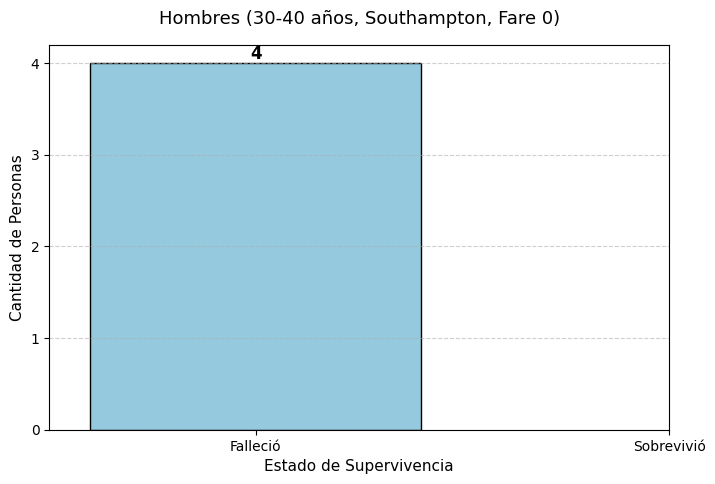

Total de personas detectadas: 4


In [5]:
import matplotlib.ticker as ticker

# Aplicamos los mismos filtros
condiciones = (
    (df['sex'] == 'male') & 
    (df['age'] >= 30) & (df['age'] <= 40) & 
    (df['embarked'] == 'S') & 
    (df['fare'] == 0)
)
hombres_especificos = df[condiciones].copy()

# Configuración de la gráfica
plt.figure(figsize=(8, 5))

if not hombres_especificos.empty:

    ax = sns.countplot(data=hombres_especificos, x='survived', color='skyblue', edgecolor='black')

    # Personalizar el eje X
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Falleció', 'Sobrevivió'])

    # FORZAR EJE Y DE 1 EN 1
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    # Títulos y etiquetas
    plt.title('Hombres (30-40 años, Southampton, Fare 0)', fontsize=13, pad=15)
    plt.xlabel('Estado de Supervivencia', fontsize=11)
    plt.ylabel('Cantidad de Personas', fontsize=11)

    # Añadir el número exacto sobre las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'Sin registros con este perfil', ha='center', va='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6) # Añade rejilla sutil para ayudar a la lectura
plt.show()

print(f"Total de personas detectadas: {len(hombres_especificos)}")

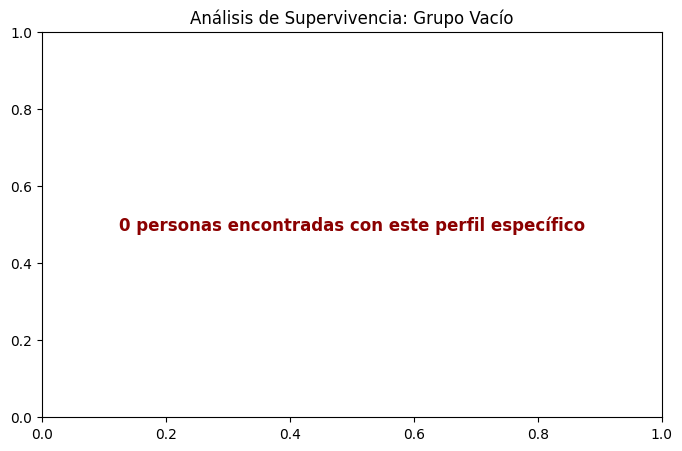

La probabilidad de supervivencia para este perfil es: 0.00%
Total de personas en este grupo: 0


In [6]:
import matplotlib.ticker as ticker

# Aplicamos los filtros incluyendo la nueva condición de 2 familiares
condiciones_fam = (
    (df['sex'] == 'male') & 
    (df['age'] >= 30) & (df['age'] <= 40) & 
    (df['embarked'] == 'S') & 
    (df['fare'] == 0) &
    ((df['sibsp'] + df['parch']) == 2)  # Exactamente 2 familiares
)

hombres_con_familia = df[condiciones_fam].copy()

# Configuración de la gráfica
plt.figure(figsize=(8, 5))

if not hombres_con_familia.empty:

    ax = sns.countplot(data=hombres_con_familia, x='survived', color='salmon', edgecolor='black')

    # Personalizar ejes
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Falleció', 'Sobrevivió'])
    
    # Forzar eje Y de 1 en 1
    ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    plt.title('Hombres (30-40 años, Southampton, Fare 0, 2 Familiares)', fontsize=12)
    plt.xlabel('Estado de Supervivencia')
    plt.ylabel('Cantidad de Personas')

    # Añadir etiquetas sobre las barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=12, fontweight='bold')
else:
    # Mensaje si no hay nadie que cumpla el perfil
    plt.text(0.5, 0.5, '0 personas encontradas con este perfil específico', 
             ha='center', va='center', fontsize=12, color='darkred', fontweight='bold')
    plt.title('Análisis de Supervivencia: Grupo Vacío')


plt.show()

# Resultado numérico
probabilidad = hombres_con_familia['survived'].mean() if not hombres_con_familia.empty else 0
print(f"La probabilidad de supervivencia para este perfil es: {probabilidad:.2%}")
print(f"Total de personas en este grupo: {len(hombres_con_familia)}")

Probabilidad puntual: 30.35%
Rango de confianza (95%): [26.46% - 34.24%]


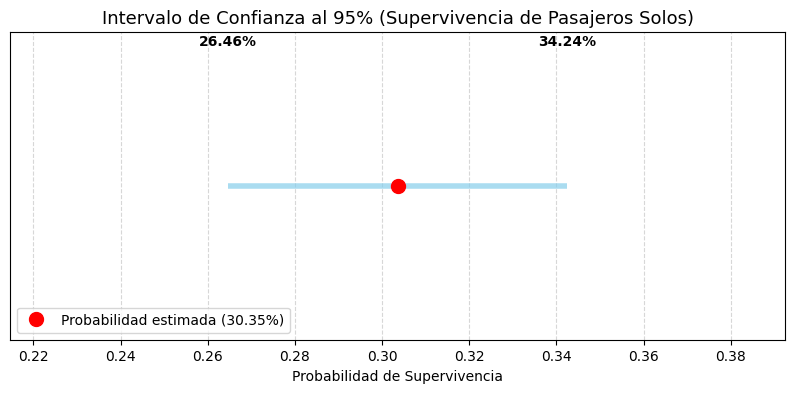

In [7]:
#Identificar personas que viajaban solas (en todo el dataset)
df['solo'] = (df['sibsp'] + df['parch'] == 0)
pasajeros_solos = df[df['solo']].copy()

# 2. Cálculos estadísticos
n = len(pasajeros_solos)
p_hat = pasajeros_solos['survived'].mean()
z = 1.96  # Valor crítico para 95% de confianza

# Error estándar
error_estandar = np.sqrt((p_hat * (1 - p_hat)) / n)

# Margen de error e intervalo
margen_error = z * error_estandar
limite_inferior = p_hat - margen_error
limite_superior = p_hat + margen_error

print(f"Probabilidad puntual: {p_hat:.2%}")
print(f"Rango de confianza (95%): [{limite_inferior:.2%} - {limite_superior:.2%}]")

# 3. Visualización del Intervalo de Confianza
plt.figure(figsize=(10, 4))

# Dibujar la línea del intervalo
plt.hlines(y=1, xmin=limite_inferior, xmax=limite_superior, color='skyblue', linewidth=4, alpha=0.7)
# Dibujar el punto central (la media)
plt.plot(p_hat, 1, 'ro', markersize=10, label=f'Probabilidad estimada ({p_hat:.2%})')

# Personalización
plt.title('Intervalo de Confianza al 95% (Supervivencia de Pasajeros Solos)', fontsize=13)
plt.xlabel('Probabilidad de Supervivencia')
plt.yticks([]) # Ocultar eje Y
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.xlim(limite_inferior - 0.05, limite_superior + 0.05) # Ajustar zoom

# Añadir etiquetas de texto a los límites
plt.text(limite_inferior, 1.05, f'{limite_inferior:.2%}', ha='center', fontweight='bold')
plt.text(limite_superior, 1.05, f'{limite_superior:.2%}', ha='center', fontweight='bold')

plt.legend()
plt.show()

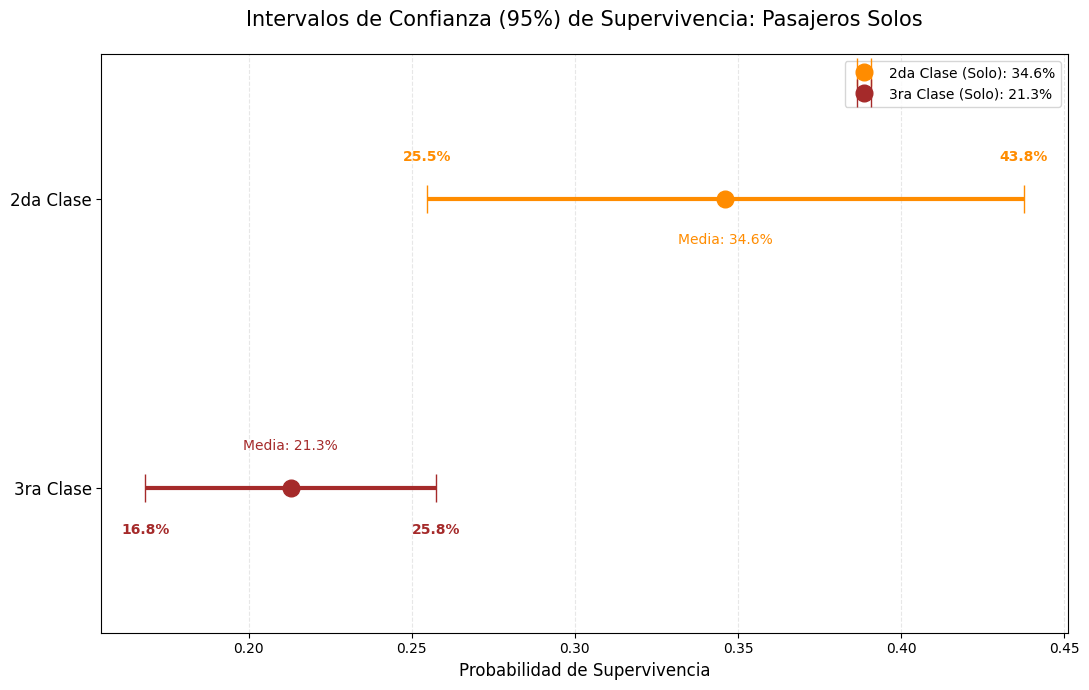

In [8]:

solos_2da = df[(df['solo'] == True) & (df['pclass'] == 2)]
solos_3ra = df[(df['solo'] == True) & (df['pclass'] == 3)]

def obtener_metricas(data):
    n = len(data)
    p = data['survived'].mean()
    error = 1.96 * np.sqrt((p * (1 - p)) / n)
    return p, p - error, p + error

p2, inf2, sup2 = obtener_metricas(solos_2da)
p3, inf3, sup3 = obtener_metricas(solos_3ra)

# Gráfica
plt.figure(figsize=(11, 7))

# Dibujar intervalos con barras de error
plt.errorbar(p2, 1, xerr=[[p2-inf2], [sup2-p2]], fmt='o', color='darkorange', 
             capsize=10, markersize=12, elinewidth=3, label=f'2da Clase (Solo): {p2:.1%}')
plt.errorbar(p3, 0, xerr=[[p3-inf3], [sup3-p3]], fmt='o', color='brown', 
             capsize=10, markersize=12, elinewidth=3, label=f'3ra Clase (Solo): {p3:.1%}')

# Colocación de etiquetas corregida (usando coordenadas relativas para evitar solapamiento)
# Etiquetas para 2da Clase (Arriba de la línea)
plt.text(inf2, 1.12, f'{inf2:.1%}', ha='center', va='bottom', color='darkorange', fontweight='bold')
plt.text(sup2, 1.12, f'{sup2:.1%}', ha='center', va='bottom', color='darkorange', fontweight='bold')
plt.text(p2, 0.88, f'Media: {p2:.1%}', ha='center', va='top', color='darkorange')

# Etiquetas para 3ra Clase (Debajo de la línea)
plt.text(inf3, -0.12, f'{inf3:.1%}', ha='center', va='top', color='brown', fontweight='bold')
plt.text(sup3, -0.12, f'{sup3:.1%}', ha='center', va='top', color='brown', fontweight='bold')
plt.text(p3, 0.12, f'Media: {p3:.1%}', ha='center', va='bottom', color='brown')

# Estética final
plt.title('Intervalos de Confianza (95%) de Supervivencia: Pasajeros Solos', fontsize=15, pad=20)
plt.xlabel('Probabilidad de Supervivencia', fontsize=12)
plt.yticks([0, 1], ['3ra Clase', '2da Clase'], fontsize=12)
plt.ylim(-0.5, 1.5)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## #2 Life Satisfaction

Carga el dataset de satifacción vital y contesta a las siguietnes preguntas:

1. ¿Podemos asegurar con cierta confianza estadística (del 99%) que la satisfaccion vital media del mundo es menor de 7?
2. ¿Qué nivel de satisfacción media asignaríamos a país con esperanza de vida de más de 65 años y tasa de empleo superior a 60%? (ojo fijate que son umbrales)
3. ¿Cuál sería la probabilidad de tener más de 6 puntos de satisfacción vital para los países con esperanza de vida mayor a 65 años y tasa de empleo superior a 60%?


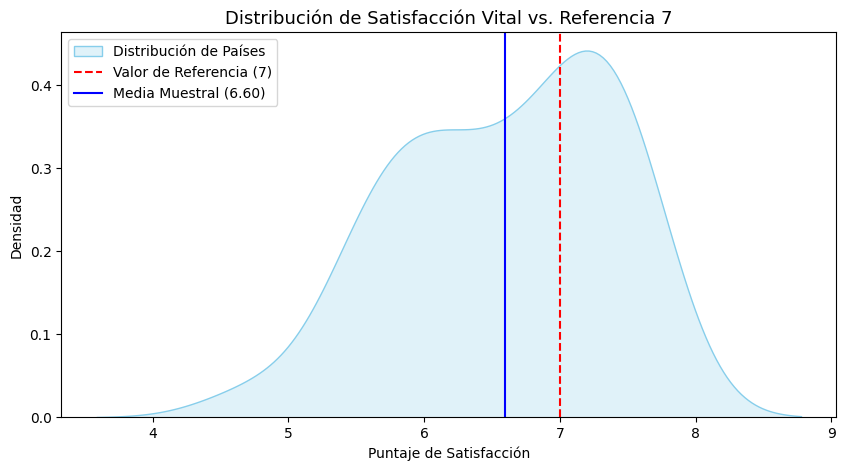

P-valor: 0.0020
¿Media < 7 con 99% confianza?: SÍ


C:\Users\ivanm\AppData\Local\Temp\ipykernel_22060\221701929.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Satisfacción ≤ 6', 'Satisfacción > 6'])


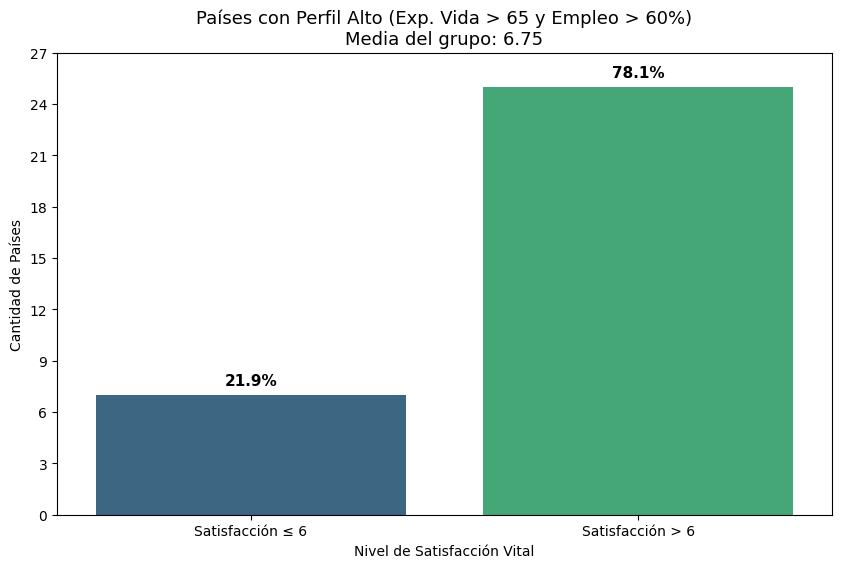

In [9]:

# 1. Cargar el dataset
df_life = pd.read_csv('data/lifesat_full.csv')

# GRÁFICO 1: DISTRIBUCIÓN Y PRUEBA DE HIPÓTESIS
plt.figure(figsize=(10, 5))
val_satisfaccion = df_life['Life satisfaction']
media_muestral = val_satisfaccion.mean()

# Crear la curva de densidad
sns.kdeplot(val_satisfaccion, fill=True, color="skyblue", label="Distribución de Países")
plt.axvline(7, color='red', linestyle='--', label='Valor de Referencia (7)')
plt.axvline(media_muestral, color='blue', label=f'Media Muestral ({media_muestral:.2f})')

plt.title('Distribución de Satisfacción Vital vs. Referencia 7', fontsize=13)
plt.xlabel('Puntaje de Satisfacción')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Resultado del test estadístico (99% de confianza)
t_stat, p_val = stats.ttest_1samp(val_satisfaccion, popmean=7, alternative='less')
print(f"P-valor: {p_val:.4f}")
print("¿Media < 7 con 99% confianza?:", "SÍ" if p_val < 0.01 else "NO")

# GRÁFICO 2: FILTRADO POR UMBRALES Y PROBABILIDAD
# Aplicar filtros: Esperanza de vida > 65 y Empleo > 60%
mask = (df_life['Life expectancy'] > 65) & (df_life['Employment rate'] > 60)
df_filtrado = df_life[mask].copy()
df_filtrado['Cumple_6'] = df_filtrado['Life satisfaction'] > 6

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtrado, x='Cumple_6', palette='viridis', hue='Cumple_6', legend=False)

# Personalización de etiquetas y ejes
ax.set_xticklabels(['Satisfacción ≤ 6', 'Satisfacción > 6'])
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Eje Y de 1 en 1

# Colocación de porcentajes sobre las barras
total_grupo = len(df_filtrado)
for p in ax.patches:
    porcentaje = f'{100 * p.get_height() / total_grupo:.1f}%'
    ax.annotate(porcentaje, 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', 
                fontsize=11, fontweight='bold',
                xytext=(0, 5), textcoords='offset points')

media_grupo = df_filtrado['Life satisfaction'].mean()
plt.title(f'Países con Perfil Alto (Exp. Vida > 65 y Empleo > 60%)\nMedia del grupo: {media_grupo:.2f}', fontsize=13)
plt.xlabel('Nivel de Satisfacción Vital')
plt.ylabel('Cantidad de Países')
plt.ylim(0, max([p.get_height() for p in ax.patches]) + 2) 
plt.show()

Número de países que cumplen los umbrales: 32
La satisfacción media asignada a este perfil es: 6.75


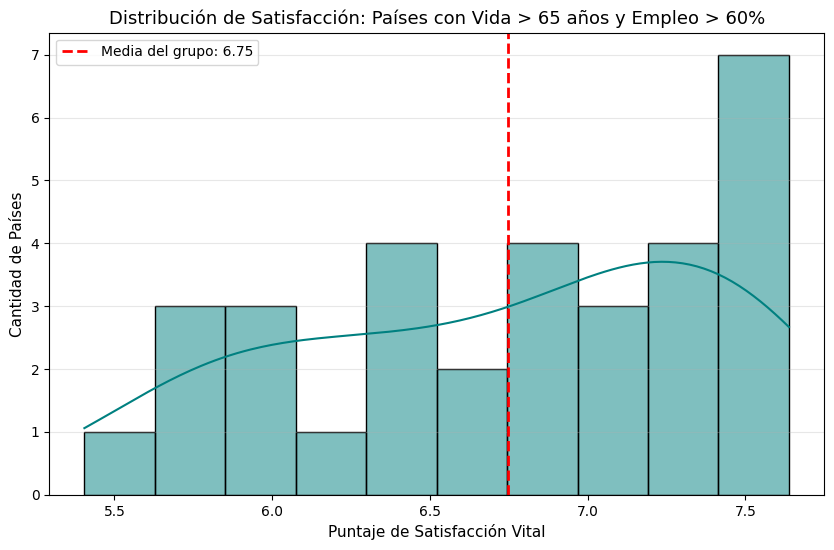

In [10]:

mask = (df_life['Life expectancy'] > 65) & (df_life['Employment rate'] > 60)
paises_filtrados = df_life[mask].copy()

# 3. Calcular la satisfacción media del grupo
satisfaccion_media = paises_filtrados['Life satisfaction'].mean()

print(f"Número de países que cumplen los umbrales: {len(paises_filtrados)}")
print(f"La satisfacción media asignada a este perfil es: {satisfaccion_media:.2f}")

# 4. Construcción de la gráfica
plt.figure(figsize=(10, 6))

# Histograma para ver cómo se distribuyen los países de este grupo específico
ax = sns.histplot(data=paises_filtrados, x='Life satisfaction', kde=True, color='teal', bins=10)

# Añadir línea de la media calculada
plt.axvline(satisfaccion_media, color='red', linestyle='--', linewidth=2, 
            label=f'Media del grupo: {satisfaccion_media:.2f}')

# Configuración estética
plt.title('Distribución de Satisfacción: Países con Vida > 65 años y Empleo > 60%', fontsize=13)
plt.xlabel('Puntaje de Satisfacción Vital', fontsize=11)
plt.ylabel('Cantidad de Países', fontsize=11)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True)) # Eje Y en números enteros
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()

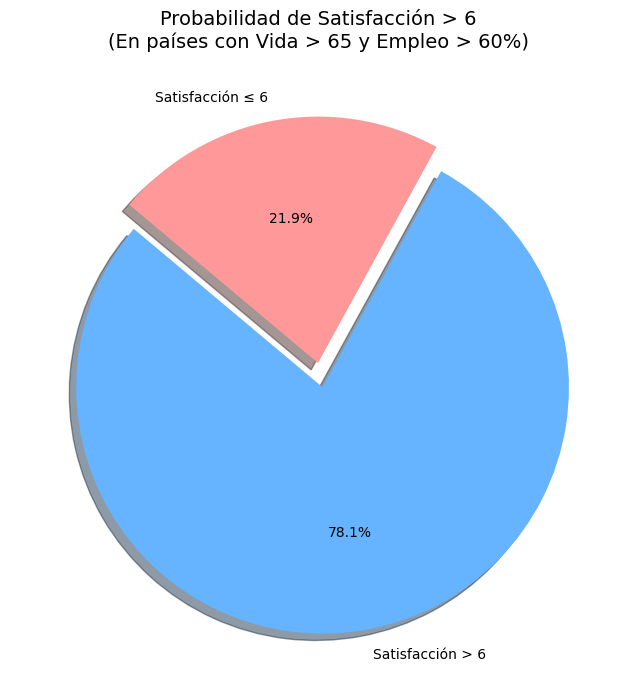

La probabilidad exacta es del 78.12%


In [11]:
# 1. Filtrar el subgrupo (Umbrales: Vida > 65 y Empleo > 60)
mask = (df_life['Life expectancy'] > 65) & (df_life['Employment rate'] > 60)
paises_perfil_alto = df_life[mask].copy()

# 2. Definir la condición de éxito
paises_perfil_alto['Satisfaccion_Alta'] = paises_perfil_alto['Life satisfaction'] > 6

# 3. Contar los casos para el gráfico
conteos = paises_perfil_alto['Satisfaccion_Alta'].value_counts()
probabilidad = (conteos[True] / conteos.sum()) * 100

# 4. Configuración del gráfico de tarta
plt.figure(figsize=(8, 8))
colores = ['#66b3ff', '#ff9999'] # Azul para > 6, Rojo para <= 6
labels = ['Satisfacción > 6', 'Satisfacción ≤ 6']

plt.pie(conteos, labels=labels, autopct='%1.1f%%', startangle=140, 
        colors=colores, explode=(0.1, 0), shadow=True)

plt.title(f'Probabilidad de Satisfacción > 6\n(En países con Vida > 65 y Empleo > 60%)', fontsize=14)
plt.show()

print(f"La probabilidad exacta es del {probabilidad:.2f}%")

## EXTRA: La contrainituividad de la probabilidad

Para poder lidiar con la incertidumbre que nos rodea, **solemos aplicar lo que llamamos nuestro "*sentido común*"**. Por ejemplo, si al levantarnos por la mañana vemos que el día se encuentra nublado, este hecho no nos da la **certeza** de que comenzará a llover más tarde; sin embargo, nuestro *sentido común* puede inducirnos a cambiar nuestros planes y a actuar como si *creyéramos* que fuera a llover si las nubes son los suficientemente oscuras o si escuchamos truenos, ya que nuestra experiencia nos dice que estos signos indicarían una mayor *posibilidad* de que el hecho de que fuera a llover más tarde realmente ocurra. 
Nuestro *sentido común* es algo tan arraigado en nuestro pensamiento, que lo utilizamos automáticamente sin siquiera ponernos a pensar en ello; pero muchas veces, el *sentido común* también nos puede jugar una mala pasada y hacernos elegir una respuesta incorrecta.


#### Situación 1 - La coincidencia de cumpleaños
Vamos a una fiesta a la que concurren un total de 50 personas. Allí un amigo nos desafía afirmando que en la fiesta debe haber por lo menos 2 personas que cumplen años el mismo día y nos apuesta 100 euros a que está en lo correcto. Es decir, que si él acierta deberíamos pagarle los 100 euros; o en caso contrario, el nos pagará los 100 euros. ¿Deberíamos aceptar la apuesta? 


#### Situación 2 - ¿Que puerta elegir? (El dilema de Monty Hall)
Estamos participando en un concurso en el cual se nos ofrece la posibilidad de elegir una entre tres puertas. Tras una de ellas se encuentra una ferrari ultimo modelo, y detrás de las otras dos hay una cabra; luego de elegir una puerta, el presentador del concurso abre una de las puertas restantes y muestra que hay una cabra (el presentador sabe que hay detrás de cada puerta). Luego de hacer esto, el presentador nos ofrece la posibilidad de cambiar nuestra elección inicial y quedarnos con la otra puerta que no habíamos elegido inicialmente. ¿Deberíamos cambiar o confiar en nuestra elección inicial?

¿Qué te diría su *sentido común* que deberían hacer en cada una de estas situaciones?